# 🤖 Modelowanie churnu – Telco
Trenujemy model ML na danych klientów, aby przewidzieć odejścia.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Wczytanie danych
df = pd.read_csv('../data/telco.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [3]:
# Wybór cech i targetu
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

In [4]:
# Podział na zbiory
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Trening modelu
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Predykcje i metryki
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.56      0.42      0.48       374

    accuracy                           0.76      1407
   macro avg       0.68      0.65      0.66      1407
weighted avg       0.74      0.76      0.75      1407



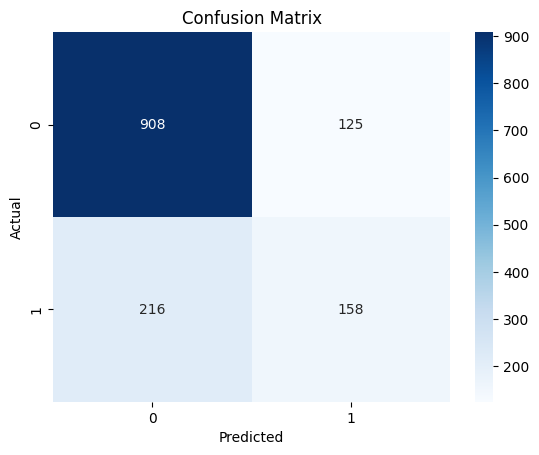

In [7]:
# Macierz pomyłek
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Zapis modelu
joblib.dump(model, '../model/model.pkl')
print('✅ Model zapisany do ../model/model.pkl')

✅ Model zapisany do ../model/model.pkl
